In [27]:
import matplotlib.pyplot as plt

In [28]:
%run motion/casadi.ipynb

Solve_Succeeded


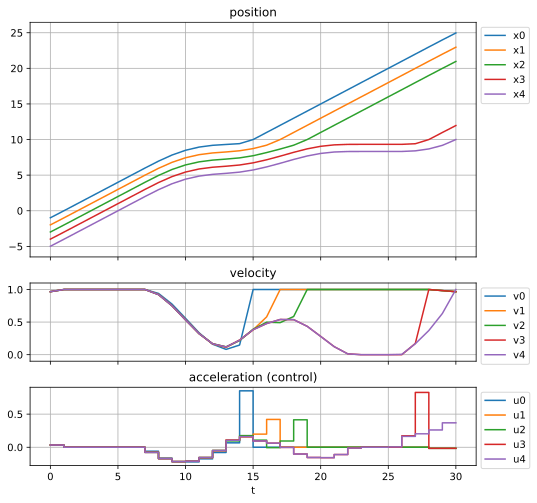

In [179]:
start_lane = 0
end_lane = 10

tgrid, x, v, u = lane_trajectories(arrivals=[1, 2, 3, 4, 5], exits=[15, 17, 19, 28, 30],
                  start_lane=start_lane, end_lane=end_lane,
                  T=30,             # time horizon
                  N=30,             # number of control intervals
                  follow_dist=1,    # safe following distance
                  umin = -1, umax = 1,
                  vmin =  0, vmax = 1,
                  alpha=-1, beta=1, gamma=10
                 )

plot_trajectories(tgrid, x, v, u, start_lane=None, end_lane=None)

In [183]:
from manim import *
import math

class CheckpointAnimation(MovingCameraScene):
    def construct(self):
        total_time = tgrid[-1]
        rects = []
        n_vehs = x.shape[1]
        for i in range(n_vehs):
            rect = Rectangle(width=0.5, height=0.9, color=ORANGE, fill_opacity=0.5)
            # rect = Prism(dimensions=[0.5, 0.9, 0.5], sheen_factor=0.2)
            rect.set_fill(ORANGE, opacity=1)
            rect.move_to((x[:,i][0], 0, 0))
            rects.append(rect)
            self.add(rect)

        lane_pos_offset = -4
        
        def get_position(t, positions=None):
            for i in range(len(tgrid)-1):
                t0, p0 = tgrid[i], positions[i]
                t1, p1 = tgrid[i+1], positions[i+1]
                if t0 <= t <= t1:
                    alpha = (t - t0) / (t1 - t0)
                    return np.array(p0) * (1-alpha) + np.array(p1) * alpha
            return np.array(positions[-1])

        tracker = ValueTracker(0)
        def updater(rect, i):
            t = tracker.get_value()

            lane_pos = get_position(t, positions=x[:,i])
            rect.move_to((0, lane_pos + lane_pos_offset, 0))
            if start_lane <= lane_pos <= end_lane:
                rect.set_opacity(1)
                rect.set_fill(opacity=0.5)
            else:
                rect.set_opacity(0)

        for i in range(n_vehs):
            rects[i].add_updater(lambda rect, i=i: updater(rect, i))

        # self.set_camera_orientation(phi=0.25*math.pi, theta=0)
        self.camera.frame.scale(2)
        self.play(
            # self.camera.frame.animate(run_time=5).scale(2),
            tracker.animate(rate_func=linear, run_time=total_time).set_value(total_time))
        self.wait()

%manim -qh CheckpointAnimation

Manim Community v0.19.0

[09/10/25 23:46:27] INFO     Animation 0 : Using cached data (hash :                           ]8;id=645132;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=893141;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             1521248988_3011546263_190027147)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=727406;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=111949;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/renderer/cairo_renderer.py#89\89]8;;\
                             1424472308_310462277_1205394159)                                                      

                    INFO     Combining to Movie file.                                      ]8;id=703416;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=457901;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#739\739]8;;\

                    INFO                                                                   ]8;id=19468;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=948773;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene_file_writer.py#886\886]8;;\
                             File ready at                                                                         
                             '/home/jeroen/repos/traffic-scheduling/media/videos/traffic-s                         
                             cheduling/1080p60/CheckpointAnimation.mp4'                                            
                                                                                                                   

                    INFO     Rendered CheckpointAnimation                                              ]8;id=911902;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=547811;file:///home/jeroen/.local/share/miniforge3/envs/traffic/lib/python3.12/site-packages/manim/scene/scene.py#255\255]8;;\
                             Played 2 animations                                                                   